# Association Rules Mining With Apriori Algorithm

## On Titanic Dataset

In [21]:
%matplotlib inline

## Imports

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

## Loading Dataset

In [23]:
titanic = pd.read_csv('/home/bhanuchander/course/Learn_MachineLearning/data/csv/titanic/train.csv')

nominal_cols = ['Embarked','Pclass','Age', 'Survived', 'Sex']

in_titanic= titanic[nominal_cols]

in_titanic['Embarked'].fillna('Unknown',inplace=True)

in_titanic['Age'].fillna(0, inplace=True)

## Binning

In [24]:
## Binning Method to categorize the Continous Variables

def binning(col, cut_points, labels=None):

  minval = col.min()
  maxval = col.max()

  break_points = [minval] + cut_points + [maxval]


  if not labels:
    labels = range(len(cut_points)+1)


  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

In [25]:
cut_points = [1, 10, 20, 50 ]

labels = ["Unknown", "Child", "Teen", "Adult", "Old"]

in_titanic['Age'] = binning(in_titanic['Age'], cut_points, labels)

# Replacing Binary with String
rep = {0: "False", 1: "True"}

in_titanic.replace({'Survived' : rep}, inplace=True)

print in_titanic.head()

  Embarked  Pclass    Age Survived     Sex
0        S       3  Adult    False    male
1        C       1  Adult     True  female
2        S       3  Adult     True  female
3        S       1  Adult     True  female
4        S       3  Adult    False    male


In [26]:
dataset = []
for i in range(0, in_titanic.shape[0]-1):
    dataset.append([str(in_titanic.values[i,j]) for j in range(0, in_titanic.shape[1])])
# dataset = in_titanic.to_xarray()

oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
print df.head()

       1      2      3  Adult      C  Child  False    Old      Q      S  \
0  False  False   True   True  False  False   True  False  False   True   
1   True  False  False   True   True  False  False  False  False  False   
2  False  False   True   True  False  False  False  False  False   True   
3   True  False  False   True  False  False  False  False  False   True   
4  False  False   True   True  False  False   True  False  False   True   

    Teen   True  Unknown  female   male  
0  False  False    False   False   True  
1  False   True    False    True  False  
2  False   True    False    True  False  
3  False   True    False    True  False  
4  False  False    False   False   True  


## All Nominal Values

In [27]:
print oht.columns_

['1', '2', '3', 'Adult', 'C', 'Child', 'False', 'Old', 'Q', 'S', 'Teen', 'True', 'Unknown', 'female', 'male']


In [28]:
output = apriori(df, min_support=0.2, use_colnames=oht.columns_)

print output.head()

    support itemsets
0  0.242697      (1)
1  0.206742      (2)
2  0.550562      (3)
3  0.528090  (Adult)
4  0.615730  (False)


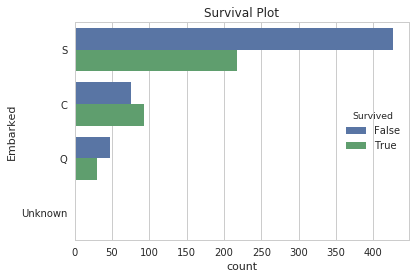

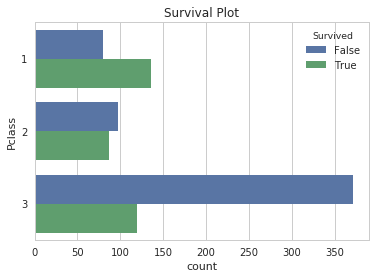

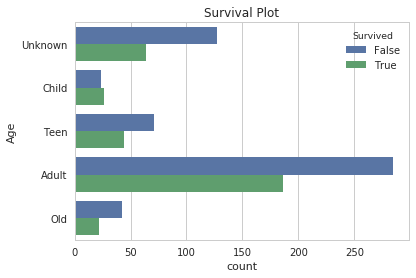

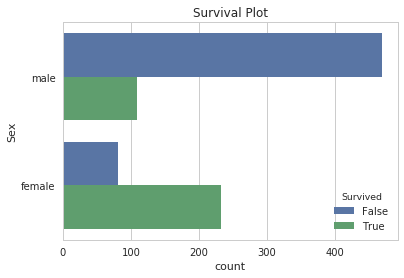

In [29]:
for x in ['Embarked', 'Pclass','Age', 'Sex']:
    sns.set(style="whitegrid")
    ax = sns.countplot(y=x, hue="Survived", data=in_titanic)
    plt.ylabel(x)
    plt.title('Survival Plot')
    plt.show()

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
   antecedents           consequents  antecedent support  consequent support  \
0          (S)         (male, False)            0.723596            0.524719   
1          (S)                (True)            0.723596            0.384270   
2          (S)         (male, Adult)            0.723596            0.340449   
3          (S)                (male)            0.723596            0.647191   
4          (S)               (False)            0.723596            0.615730   
5          (S)               (Adult)            0.723596            0.528090   
6          (S)  (male, False, Adult)            0.723596            0.275281   
7          (S)                   (3)            0.723596            0.550562   
8          (S)      (3, male, False)            0.723596            0.335955   
9          (S)              (female)            0.723596            0.352

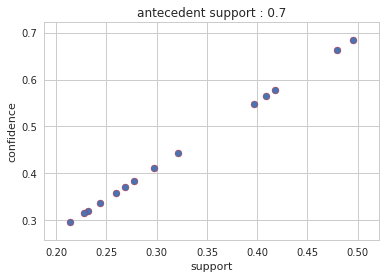

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
  antecedents consequents  antecedent support  consequent support   support  \
0      (male)     (False)            0.647191            0.615730  0.524719   
1     (False)      (male)            0.615730            0.647191  0.524719   

   confidence      lift  leverage  conviction  
0    0.810764  1.316752  0.126224    2.030636  
1    0.852190  1.316752  0.126224    2.386905  


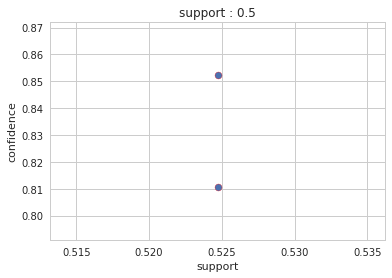

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
      antecedents    consequents  antecedent support  consequent support  \
0       (S, male)        (False)            0.495506            0.615730   
1      (S, False)         (male)            0.479775            0.647191   
2   (male, False)            (S)            0.524719            0.723596   
3             (S)  (male, False)            0.723596            0.524719   
4          (male)     (S, False)            0.647191            0.479775   
5         (False)      (S, male)            0.615730            0.495506   
6             (3)         (male)            0.550562            0.647191   
7          (male)            (3)            0.647191            0.550562   
8          (male)        (False)            0.647191            0.615730   
9         (False)         (male)            0.615730            0.647191   
10            (S)         (male)     

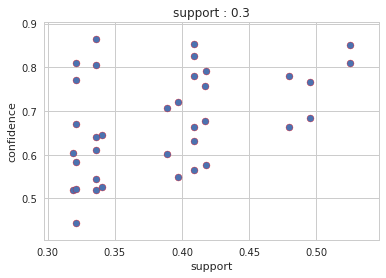

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
       antecedents    consequents  antecedent support  consequent support  \
0        (S, male)        (False)            0.495506            0.615730   
1       (S, False)         (male)            0.479775            0.647191   
2    (male, False)            (S)            0.524719            0.723596   
3              (S)  (male, False)            0.723596            0.524719   
4           (male)     (S, False)            0.647191            0.479775   
5          (False)      (S, male)            0.615730            0.495506   
6           (True)       (female)            0.384270            0.352809   
7         (female)         (True)            0.352809            0.384270   
8              (3)         (male)            0.550562            0.647191   
9           (male)            (3)            0.647191            0.550562   
10   (male, False)        

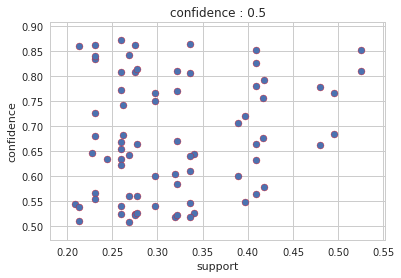

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
         antecedents     consequents  antecedent support  consequent support  \
0          (S, male)         (False)            0.495506            0.615730   
1         (S, False)          (male)            0.479775            0.647191   
2      (male, False)             (S)            0.524719            0.723596   
3                (S)   (male, False)            0.723596            0.524719   
4             (male)      (S, False)            0.647191            0.479775   
5            (False)       (S, male)            0.615730            0.495506   
6             (True)        (female)            0.384270            0.352809   
7           (female)          (True)            0.352809            0.384270   
8                (3)          (male)            0.550562            0.647191   
9             (male)             (3)            0.647191            0.550

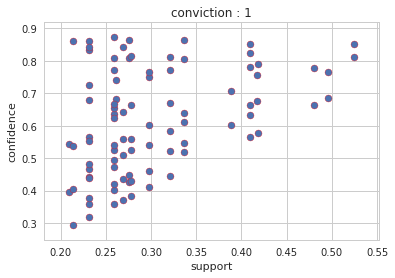

In [30]:
config = [
    ('antecedent support', 0.7),
    ('support', 0.5),
    ('support', 0.3),
    ('confidence', 0.5),
    ('conviction', 1)
]

for metric_type, th in config:
    rules = association_rules(output, metric=metric_type, min_threshold=th)
    if rules.empty:
        print 'Empty Data Frame For Metric Type : ',metric_type,' on Threshold : ',th
        continue
    print rules.columns.values
    print (rules)

    support=rules.as_matrix(columns=['support'])
    confidence=rules.as_matrix(columns=['confidence'])

    plt.scatter(support, confidence, edgecolors='red')
    plt.xlabel('support')
    plt.ylabel('confidence')
    plt.title(metric_type+' : '+str(th))
    plt.show()

In [31]:
output = apriori(df, min_support=0.1, use_colnames=oht.columns_)

print output.head()

    support itemsets
0  0.242697      (1)
1  0.206742      (2)
2  0.550562      (3)
3  0.528090  (Adult)
4  0.188764      (C)


['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
   antecedents              consequents  antecedent support  \
0          (S)                   (male)            0.723596   
1          (S)            (male, False)            0.723596   
2          (S)                   (True)            0.723596   
3          (S)           (True, female)            0.723596   
4          (S)            (male, Adult)            0.723596   
5          (S)                  (False)            0.723596   
6          (S)                      (2)            0.723596   
7          (S)                      (1)            0.723596   
8          (S)                (3, male)            0.723596   
9          (S)                 (female)            0.723596   
10         (S)                      (3)            0.723596   
11         (S)     (male, False, Adult)            0.723596   
12         (S)         (3, male, False)            0.7

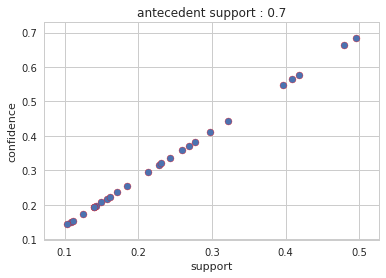

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
   antecedents consequents  antecedent support  consequent support   support  \
0  (1, female)      (True)            0.105618            0.384270  0.102247   
1   (2, Adult)         (S)            0.138202            0.723596  0.124719   
2   (2, False)      (male)            0.108989            0.647191  0.102247   

   confidence      lift  leverage  conviction  
0    0.968085  2.519286  0.061661   19.292884  
1    0.902439  1.247160  0.024717    2.833146  
2    0.938144  1.449563  0.031711    5.703745  


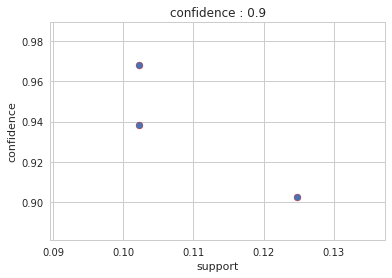

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
                antecedents consequents  antecedent support  \
0                 (S, male)     (False)            0.495506   
1                (S, False)      (male)            0.479775   
2             (True, Adult)    (female)            0.208989   
3           (Adult, female)      (True)            0.187640   
4             (male, Adult)     (False)            0.340449   
5            (False, Adult)      (male)            0.319101   
6           (Unknown, male)     (False)            0.150562   
7          (Unknown, False)      (male)            0.142697   
8                    (True)    (female)            0.384270   
9                  (female)      (True)            0.352809   
10                   (male)     (False)            0.647191   
11                  (False)      (male)            0.615730   
12              (1, female)      (True)            0.1

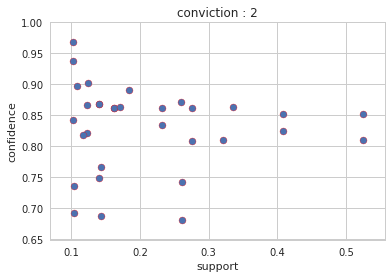

In [32]:
config = [
    ('antecedent support', 0.7),
    ('confidence', 0.9),
    ('conviction', 2)
]

for metric_type, th in config:
    rules = association_rules(output, metric=metric_type, min_threshold=th)
    if rules.empty:
        print 'Empty Data Frame For Metric Type : ',metric_type,' on Threshold : ',th
        continue
    print rules.columns.values
    print (rules)

    support=rules.as_matrix(columns=['support'])
    confidence=rules.as_matrix(columns=['confidence'])

    plt.scatter(support, confidence, edgecolors='red')
    plt.xlabel('support')
    plt.ylabel('confidence')
    plt.title(metric_type+' : '+str(th))
    plt.show()

## Interesting Informations:

- Persons Who are Sex: female       With  PcClass: 1, have 96.80 % Confidence Survived : True
- Persons Who are PcClass: 2        With  Survived: False, have 93.81% Confidence Sex: Male
- Persons Who are Survived : False  With  Age : UnKnown , have 81.88 %  Confidence  PcClass : 3
- Persons Who are Age : Adult       With  PcClass : 2   , have 90.2 %   Confidence Embarked : S
- Persons Who are Survived: False   With  Age : Adult and PcClass : 3, have 86.36% Confidence Embarked: S

## Simple Filtering Example

In [36]:
rules[rules['confidence']==rules['confidence'].min()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(True),(female),0.38427,0.352809,0.261798,0.681287,1.931035,0.126224,2.030636


In [37]:
rules[rules['confidence']==rules['confidence'].max()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,"(1, female)",(True),0.105618,0.38427,0.102247,0.968085,2.519286,0.061661,19.292884


In [38]:
rules = association_rules(output, metric='support', min_threshold=0.1)

In [39]:
rules[rules['confidence']==rules['confidence'].min()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
274,(S),"(True, Adult, female)",0.723596,0.14382,0.103371,0.142857,0.993304,-0.000697,0.998876


In [40]:
rules[rules['confidence']==rules['confidence'].max()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
55,"(1, female)",(True),0.105618,0.38427,0.102247,0.968085,2.519286,0.061661,19.292884
